# import packages

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv file

In [2]:
data=pd.read_csv("Suicidesindia2001-2012.csv")
data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [3]:
# row and coulumn
data.shape


(237519, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# Total suicides in india

In [6]:
data["Total"]

0            0
1            0
2            0
3            0
4            0
          ... 
237514     149
237515     233
237516    5451
237517     189
237518    2658
Name: Total, Length: 237519, dtype: int64

In [7]:
data.Total.sum() #2001 to 2012 suicides  total case 

13071734

# Total suicieds in india state wise

In [8]:
index = data['State']=='Punjab'
data [index].Total.sum()

46350

In [9]:
data.groupby('State').Total.sum() #state wise group data
data.groupby('State').Total.sum().sort_values(ascending=False) # ascending order

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

# Total suicides in india year wise

In [10]:
D= data.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [11]:
x=D.index.values
y=D.values

scetter plot

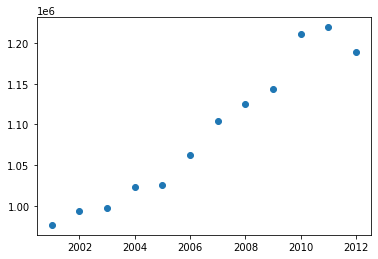

In [12]:
plt.scatter(x,y)
plt.show()

# Total suicides in india gender wise

In [13]:
data.groupby("Gender").Total.sum()

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

# Total suicides in india state-year wise

In [14]:
data.groupby(["State","Year"])[['Total']].sum().to_html("state._year_wise.html") #save the output html file

data.groupby(["State","Year"])[['Total']].sum().to_csv("state._year_wise.csv")#save the output csv file

# Total suicides in inida state-Gender wise

In [15]:
data.groupby(["State","Gender"])[['Total']].sum()

Total
State             Gender        
A & N Islands     Female    2750
                  Male      5359
Andhra Pradesh    Female  271939
                  Male    542120
Arunachal Pradesh Female    1954
...                          ...
Uttar Pradesh     Male    125327
Uttarakhand       Female    7548
                  Male     10948
West Bengal       Female  365241
                  Male    484695

[76 rows x 1 columns]

# Total suicides in inida Year-Gender wise

In [16]:
data.groupby(["Year","Gender"])[['Total']].sum()

Total
Year Gender        
2001 Female  379645
     Male    596819
2002 Female  369675
     Male    623973
2003 Female  365657
     Male    631965
2004 Female  369297
     Male    653840
2005 Female  368980
     Male    656221
2006 Female  381677
     Male    681314
2007 Female  390032
     Male    713635
2008 Female  400202
     Male    724880
2009 Female  411050
     Male    732983
2010 Female  426705
     Male    784617
2011 Female  429688
     Male    789811
2012 Female  410366
     Male    778702

# Total suicides in india State-Year-Gender wise

In [17]:
data.groupby(["State","Year","Gender"])[['Total']].sum().to_html("state_year_gender wise.html")

In [18]:
data.groupby("Type").Total.sum().sort_values(ascending=False)

Type
Married                                           3065322
Primary                                           1088481
Middle                                            1028913
No Education                                       965271
Never Married                                      954903
                                                   ...   
Bankruptcy or Sudden change in Economic Status       2655
Illegitimate Pregnancy                               2494
Ideological Causes/Hero Worshipping                  2118
By Machine                                           1661
Not having Children (Barrenness/Impotency             766
Name: Total, Length: 69, dtype: int64

# Machine learning

In [19]:
D=data.groupby("Year").Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [20]:
x=D.index.values.reshape(-1,1)
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [21]:
y=D.values
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [22]:
# formule-------> y= mx + c

from sklearn.linear_model import LinearRegression 
l=LinearRegression()
l.fit(x,y)

LinearRegression()

In [23]:
YP=l.predict(x) #  predict values
YP

array([ 958311.12820512,  982129.31701631, 1005947.5058275 ,
       1029765.69463869, 1053583.88344987, 1077402.07226107,
       1101220.26107226, 1125038.44988345, 1148856.63869463,
       1172674.82750582, 1196493.01631701, 1220311.2051282 ])

In [24]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

mae = mae(y,YP)
mse = mse(y,YP)
rmse = np.sqrt(mse)
accuracy = r2_score(y,YP)

print('MAE :',mae)
print('MSE :',mse)
print('RMSE :',rmse)
print('Accuracy :',accuracy)

MAE : 15635.833333333334
MSE : 384750045.04741055
RMSE : 19615.046394220193
Accuracy : 0.9461522633937145


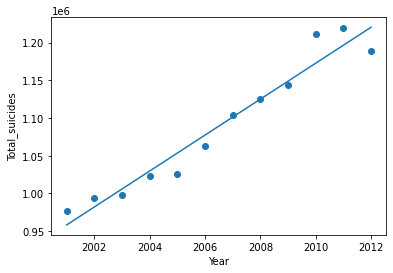

In [25]:
plt.scatter(x,y) # y ---> actule value 
plt.plot(x,YP) # YP ----> predict value 
plt.xlabel("Year")
plt.ylabel("Total_suicides")
plt.show()

In [26]:
l.coef_    #   m

array([23818.18881119])

In [27]:
l.intercept_   #   c

-46701884.682983674

In [28]:
y   # actule values

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

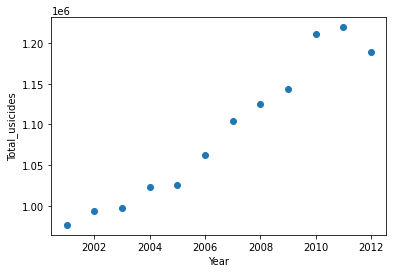

In [29]:
plt.scatter(x,y)

plt.xlabel("Year")
plt.ylabel("Total_usicides")
plt.show()

In [30]:
l.score(x,y)*100

94.61522633937145

In [31]:
l.predict([[2020]]) # 2020 predict suicides values

array([1410856.71561771])

# polunomial Regresstion

In [32]:
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [33]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state = 1)

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=4)
ployx =poly.fit_transform(x)

In [65]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(ployx,y)
ypred=linreg.predict(poly.fit_transform(x))

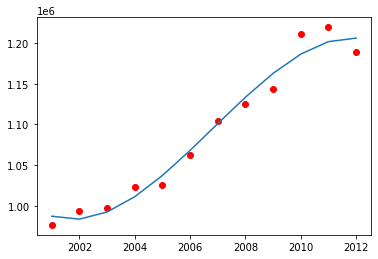

In [66]:
plt.scatter(x,y,color='red')
plt.plot(x,ypred)
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

mae = mae(y,ypred)
mse = mse(y,ypred)
rmse = np.sqrt(mse)
accuracy = r2_score(y,ypred)

print('MAE :',mae)
print('MSE :',mse)
print('RMSE :',rmse)
print('Accuracy :',accuracy)

MAE : 12057.072713216146
MSE : 184407676.41064152
RMSE : 13579.678803662535
Accuracy : 0.9741912025343266
